## Import Libraries and Data

In [1]:
import PipettingMassBalance as pmb
import pandas as pd
%matplotlib notebook

speciesList = pmb.PipettingSpecies.readCSV('SpeciesDictionary.csv')
instructions = pmb.PipettingInstructions.readCSV('DoE_csv/MasterDataset_OT_DoE_06-7-03-23.csv', firstRow=126, lastRow=132)
targetVolume = 10
sampleList = pmb.PipettingSample.createSamples(instructions,targetVol=targetVolume)
maxVolume = 1
for sample in sampleList:
    sample.getTotalDensity(speciesDictionary=speciesList)
    sample.getVolFracSeries(speciesDictionary=speciesList)
steps = pmb.PipettingStep.createSteps(instructions=instructions,speciesDictionary=speciesList,sampleList=sampleList,maxVol=maxVolume)

massProfile = pmb.MassProfile('mass_data/MassProfile_060323_S127-132.csv',t_baseline=50,derivNoise=0.005,secDerivNoise=0.001)

## Analyse Water Addition

In [2]:
(water_mass,t1)=massProfile.analyseWater(avg_window=10,bl_mult=5)
water=pmb.PipettingSpecies.getSpecies(speciesList, 'water')
water_volume_act=water.getVolume(water_mass)
water_volume_set=0
for sample in sampleList:
    water_volume = sample.waterVol
    water_volume_set = water_volume_set + water_volume
    sample.actualMass = water_volume/water.density
print("This equals a volume of " + str(round(water_volume_act,3)) + "m; expected was "\
      + str(round(water_volume_set,3)) + "mL; error is " + str(round(abs((water_volume_set-water_volume_act)/water_volume_set)*100,3)) + "%")

Water Transfer started at t=116s and ended at t=512s; mass=42.98069999999999g
This equals a volume of 43.067m; expected was 43.373mL; error is 0.707%


## Analyse Surfactants

Peak threshold for 1st derivative = 0.001 g/s and for 2nd derivative = 0.0002 g/s^2


<IPython.core.display.Javascript object>


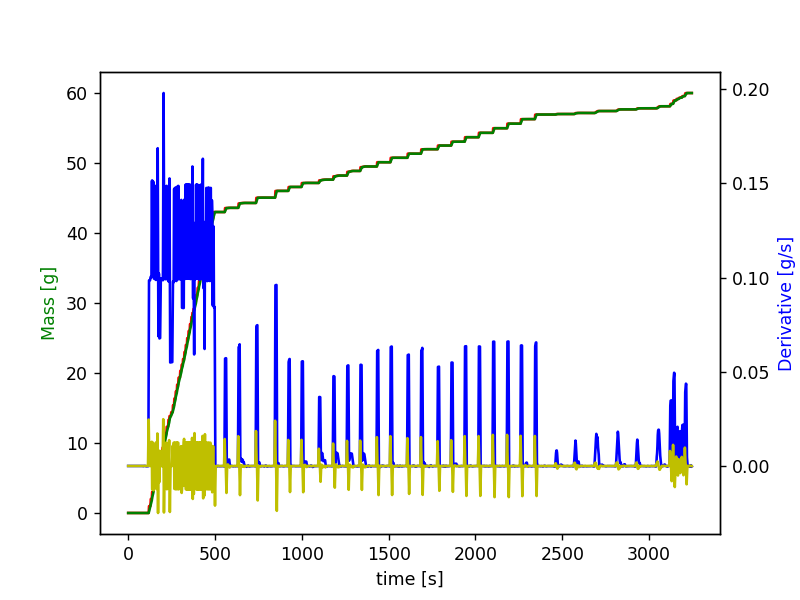

Addition of 0.603g Plantapon ACG 50 detected from 552s to 590s - expected volume = 0.579mL and actual volume = 0.539mL (resulting error is 6.975%)
Addition of 0.701g Plantapon ACG 50 detected from 630s to 674s - expected volume = 0.579mL and actual volume = 0.627mL (resulting error is 8.21%)
Addition of 0.763g Dehyton MC detected from 732s to 764s - expected volume = 0.76mL and actual volume = 0.698mL (resulting error is 8.147%)
Addition of 0.974g Dehyton PK 45 detected from 842s to 872s - expected volume = 0.945mL and actual volume = 0.925mL (resulting error is 2.199%)
Addition of 0.566g Dehyton PK 45 detected from 918s to 940s - expected volume = 0.52mL and actual volume = 0.533mL (resulting error is 2.371%)
Addition of 0.576g Dehyton PK 45 detected from 994s to 1034s - expected volume = 0.52mL and actual volume = 0.542mL (resulting error is 4.271%)
Addition of 0.475g Dehyton ML detected from 1094s to 1142s - expected volume = 0.577mL and actual volume = 0.45mL (resulting error is 22

In [3]:
t2 = massProfile.analyseIngredients(avg_window=5, bl_mult=5, mergeSens=10, specType='surfactant', steps=steps,start_idx=t1,show=True)

## Analyse Polyelectrolytes

Peak threshold for 1st derivative = 0.00125 g/s and for 2nd derivative = 0.00025 g/s^2


<IPython.core.display.Javascript object>


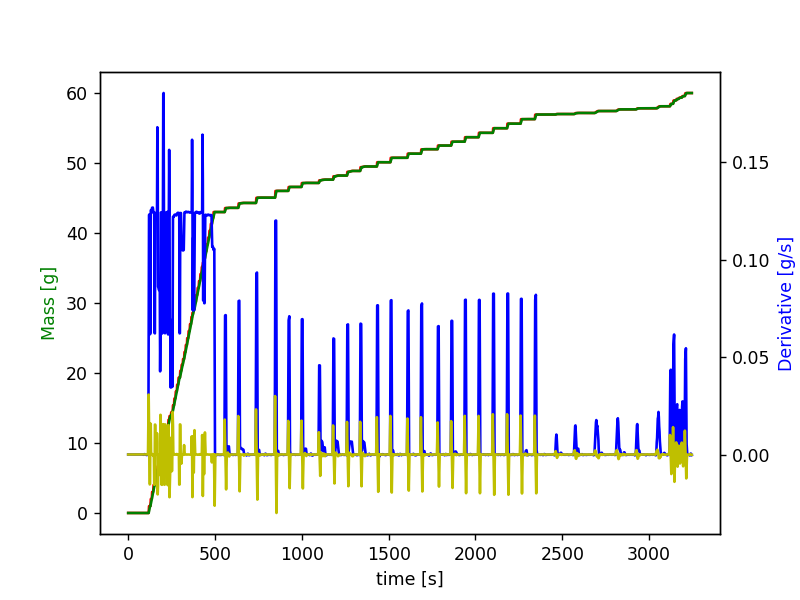

Addition of 0.079g Luviquat Excellence detected from 2456s to 2478s - expected volume = 0.092mL and actual volume = 0.071mL (resulting error is 22.304%)
Addition of 0.156g Luviquat Excellence detected from 2564s to 2600s - expected volume = 0.144mL and actual volume = 0.143mL (resulting error is 0.557%)
Addition of 0.28g Luviquat Excellence detected from 2682s to 2716s - expected volume = 0.262mL and actual volume = 0.252mL (resulting error is 3.981%)
Addition of 0.235g Luviquat Excellence detected from 2720s to 2842s - expected volume = 0.211mL and actual volume = 0.21mL (resulting error is 0.53%)
Addition of 0.156g Luviquat Excellence detected from 2850s to 2952s - expected volume = 0.14mL and actual volume = 0.14mL (resulting error is 0.318%)
Addition of 0.294g Luviquat Excellence detected from 3038s to 3072s - expected volume = 0.27mL and actual volume = 0.264mL (resulting error is 2.167%)


In [4]:
t3 = massProfile.analyseIngredients(avg_window=4, bl_mult=5, mergeSens=4, specType='polyelectrolyte',steps=steps,start_idx=t2,show=True)

## Analyse Thickeners

Peak threshold for 1st derivative = 0.005 g/s and for 2nd derivative = 0.00125 g/s^2


<IPython.core.display.Javascript object>


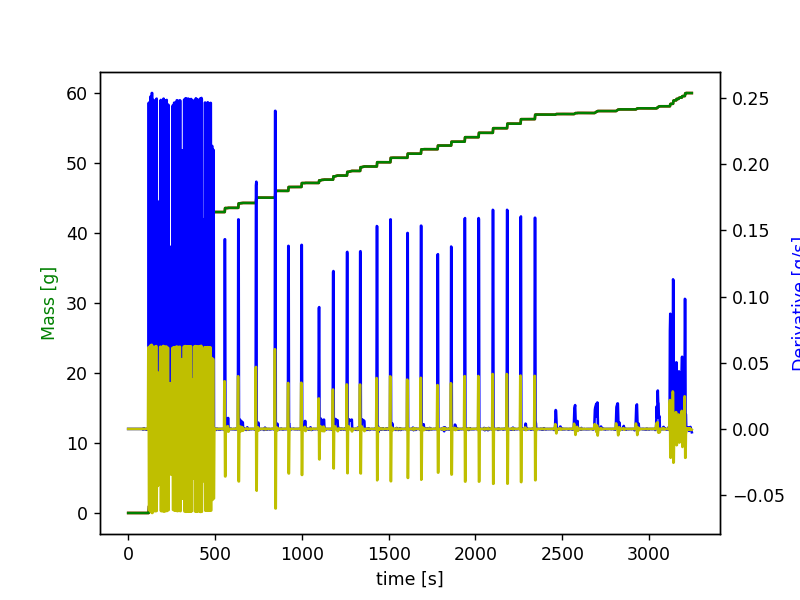

Addition of 0.346g Arlypon TT detected from 3116s to 3130s - expected volume = 0.367mL and actual volume = 0.36mL (resulting error is 1.841%)
Addition of 0.495g Arlypon TT detected from 3134s to 3150s - expected volume = 0.466mL and actual volume = 0.524mL (resulting error is 12.358%)
Addition of 0.208g Arlypon TT detected from 3152s to 3164s - expected volume = 0.119mL and actual volume = 0.215mL (resulting error is 80.87%)
Addition of 0.187g Arlypon TT detected from 3166s to 3180s - expected volume = 0.115mL and actual volume = 0.192mL (resulting error is 66.964%)
Addition of 0.219g Arlypon TT detected from 3184s to 3198s - expected volume = 0.185mL and actual volume = 0.226mL (resulting error is 22.346%)
Addition of 0.437g Arlypon TT detected from 3202s to 3218s - expected volume = 0.433mL and actual volume = 0.453mL (resulting error is 4.545%)


In [5]:
t4 = massProfile.analyseIngredients(avg_window=1, bl_mult=5, mergeSens=1, specType='thickener',steps=steps,start_idx=t3,show=True)

## Consolidate results and create output

In [6]:
for step in steps:
    step.addToSample()
actualMassFractions = pd.DataFrame(dtype='float64').reindex_like(instructions)
actualMassFractions[:]=0
for i in range(len(sampleList)):
    actualMassFractions['ID'].iloc[i] = sampleList[i].sampleId
    for entry in sampleList[i].addedMassSeries.iteritems():
        actualMassFractions[entry[0]].iloc[i] = entry[1]/sampleList[i].actualMass*100
actualMassFractions.to_csv('mass_data/FreshlyAnalysed_060323_S127-S132.csv', index=False)
actualMassFractions

C:\Users\ACHI01\AppData\Local\Temp\ipykernel_7520\777448311.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for entry in sampleList[i].addedMassSeries.iteritems():


,ID,Texapon SB 3 KC,Plantapon ACG 50,Plantapon LC 7,Plantacare 818,Plantacare 2000,Dehyton MC,Dehyton PK 45,Dehyton ML,Dehyton AB 30,Plantapon Amino SCG-L,Plantapon Amino KG-L,Dehyquart A-CA,Luviquat Excellence,Dehyquart CC6,Dehyquart CC7 Benz,Salcare Super 7,Arlypon F,Arlypon TT
126,127.0,0.0,0.000000,0.0,0.0,0.0,0.000000,9.690743,0.000000,12.505148,0.0,0.000000,0.000000,0.788411,0.0,0.0,0.0,0.0,3.447123
127,128.0,0.0,12.901149,0.0,0.0,0.0,0.000000,0.000000,10.490099,0.000000,0.0,0.000000,0.000000,1.544626,0.0,0.0,0.0,0.0,4.902239
128,129.0,0.0,0.000000,0.0,0.0,0.0,7.585979,0.000000,0.000000,0.000000,0.0,0.000000,10.808007,2.786478,0.0,0.0,0.0,0.0,2.067187
129,130.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,12.140124,12.549809,2.323031,0.0,0.0,0.0,0.0,1.850508
130,131.0,0.0,0.000000,0.0,0.0,0.0,0.000000,11.275260,0.000000,0.000000,0.0,0.000000,13.021311,1.545571,0.0,0.0,0.0,0.0,2.162812
131,132.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,12.870893,0.000000,0.0,0.000000,12.921336,2.902949,0.0,0.0,0.0,0.0,4.322278
